In [1]:
#project : predict Either the patient is Heart patient or not
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
#to load dataset 
df=pd.read_csv("heart.csv")

In [3]:
#to show first 5 records
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
#check null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
'''We have a data which classified if patients have heart disease or not 
according to features in it. We will try to use this data to create a model
which tries predict if a patient has this disease or not. 
We will use logistic regression (classification) algorithm.'''

'We have a data which classified if patients have heart disease or not \naccording to features in it. We will try to use this data to create a model\nwhich tries predict if a patient has this disease or not. \nWe will use logistic regression (classification) algorithm.'

In [8]:
#separate numerical type data and categorical type data 
#we create a list object num which hold all numeric type data from dataframe df
num = ["age","trestbps","chol","thalach","oldpeak"]
#we create a list object cat which hold all categorical type data from dataframe df
cat = ["sex","cp","fbs","exang","restecg","slope","ca","thal"]

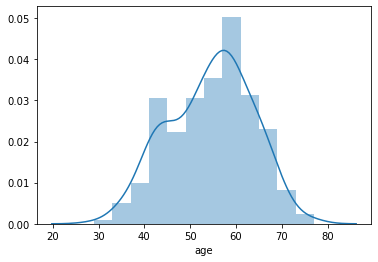

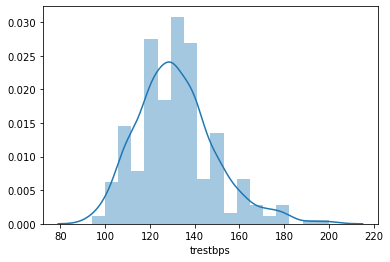

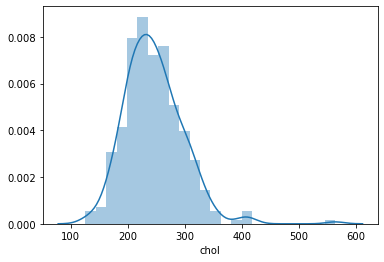

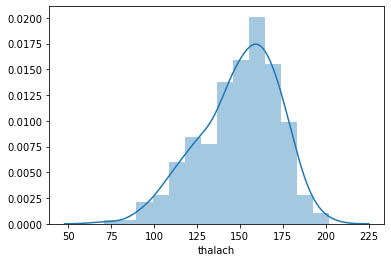

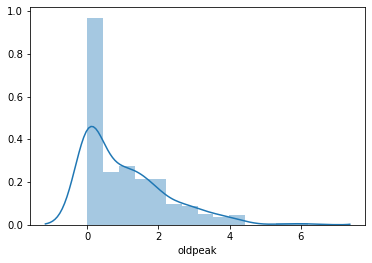

In [9]:
#visualise distplot : create normal distributed curve , either data is 
#equally distribute or not  , displot always numerical type data
for col in num:
    sns.distplot(df[col])
    plt.show()

age
-0.2014596901125439


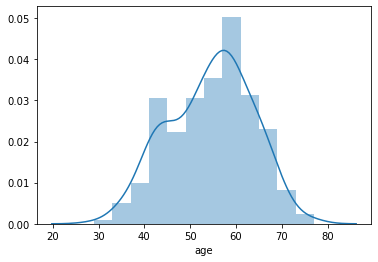

trestbps
0.7102300604861443


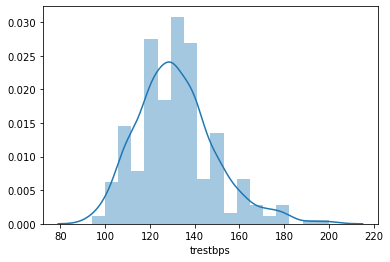

chol
1.1377326187082244


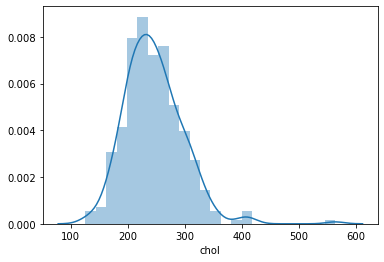

thalach
-0.5347455419075503


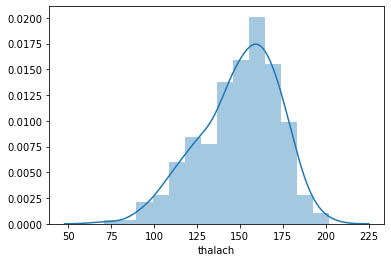

oldpeak
1.2634255245891595


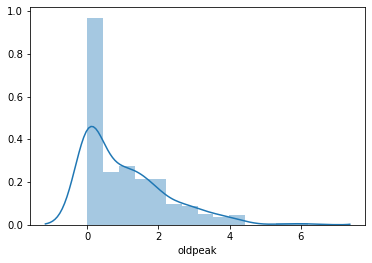

In [10]:
#Also check value of skewness
from scipy.stats import skew
for col in num:
    print(col)
    print(skew(df[col]))
    sns.distplot(df[col])
    plt.show()

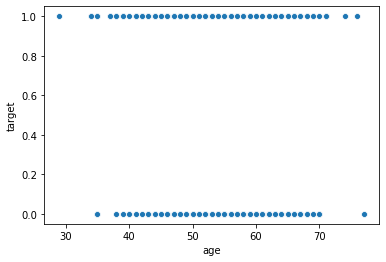

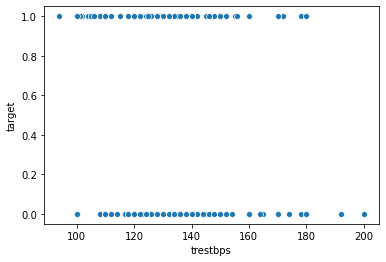

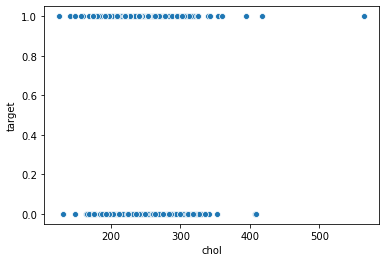

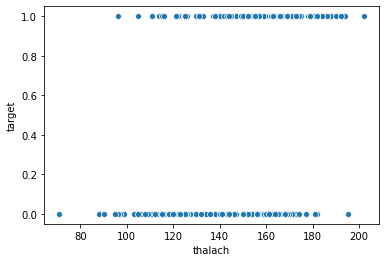

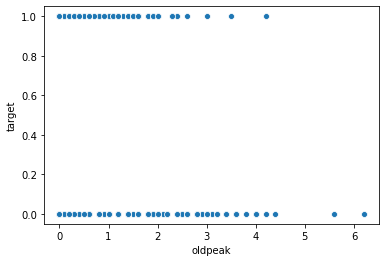

In [11]:
#manually data analysis which numerical input imp to predict the target
for col in num:
    plt.figure()
    sns.scatterplot(data=df,x=col,y="target")
    plt.show()

In [12]:
#categorical data
print(cat)

['sex', 'cp', 'fbs', 'exang', 'restecg', 'slope', 'ca', 'thal']


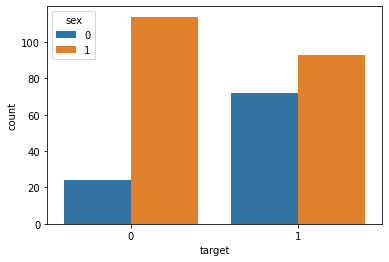

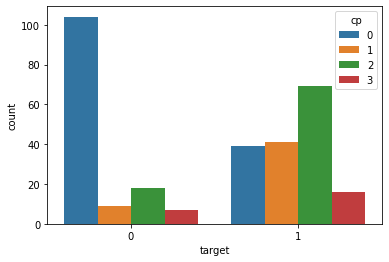

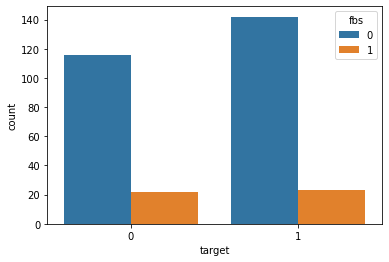

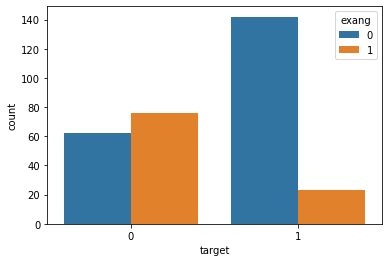

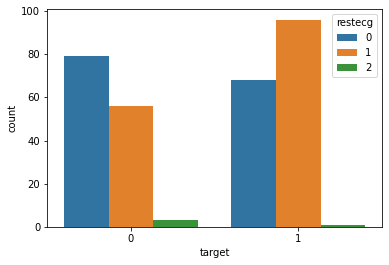

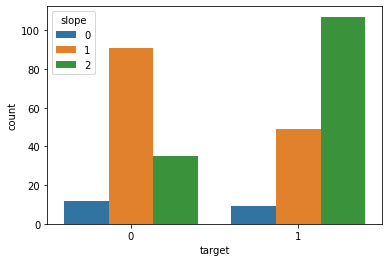

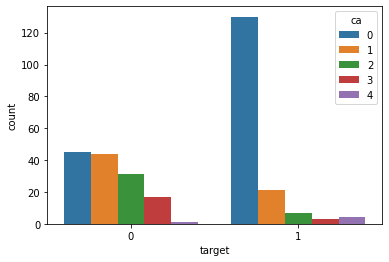

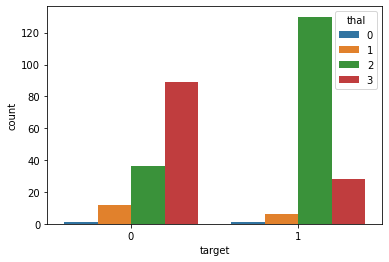

In [13]:
#which features are important in categorical type data then use countplot()
#inbuilt function of seaborn library
for col in cat:
    plt.figure()
    sns.countplot(data=df,x="target",hue=col)#alwyas change hue means keep 
    #input features and x =target this is fixed
    plt.show()

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
#select Input and output variable from dataframe df
#means select Independent variable X and dependent variable Y
X=df.drop("target",axis=1)
Y=df["target"]

In [16]:
#train test split 
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [25]:
#create function
def create_model(model):
    model.fit(X_train,Y_train) #train the model
    y_pred=model.predict(X_test) #test the model
    print(classification_report(Y_test,y_pred))
    print("Confusion matrix: ")
    print(confusion_matrix(Y_test,y_pred))
    return model

In [26]:
from sklearn.metrics import classification_report
#Confusion Matrix
from sklearn.metrics import confusion_matrix

# BaseLine Model : Logistic Regression 

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
#create the object of LogisticRegression class
lr=LogisticRegression()

In [ ]:
# call function 
lr=create_model(lr)

In [23]:
'''
              Actual
             1   0
predicted 1  TP  FP  
          0  FN  TN
    
'''
#here my focus : FN means 7 patient : check recall

# Use DecisionTreeClassifier algorithm

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
#create object of DecisionTreeClassifier class
dt=DecisionTreeClassifier() #bydefault gini index 

In [33]:
#DecisionTreeClassifier : select important features to predcit the output
#call function
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.66      0.71      0.68        41
           1       0.74      0.70      0.72        50

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

Confusion matrix: 
[[29 12]
 [15 35]]


In [36]:
#to show imp features 
dt.feature_importances_   # (show reduction)

array([0.09395307, 0.01713481, 0.31774899, 0.07351301, 0.09175021,
       0.        , 0.        , 0.03623003, 0.11895301, 0.08111203,
       0.        , 0.13516854, 0.03443628])

In [37]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [38]:
#we visualize the tree
from sklearn import tree

In [39]:
features=X.columns

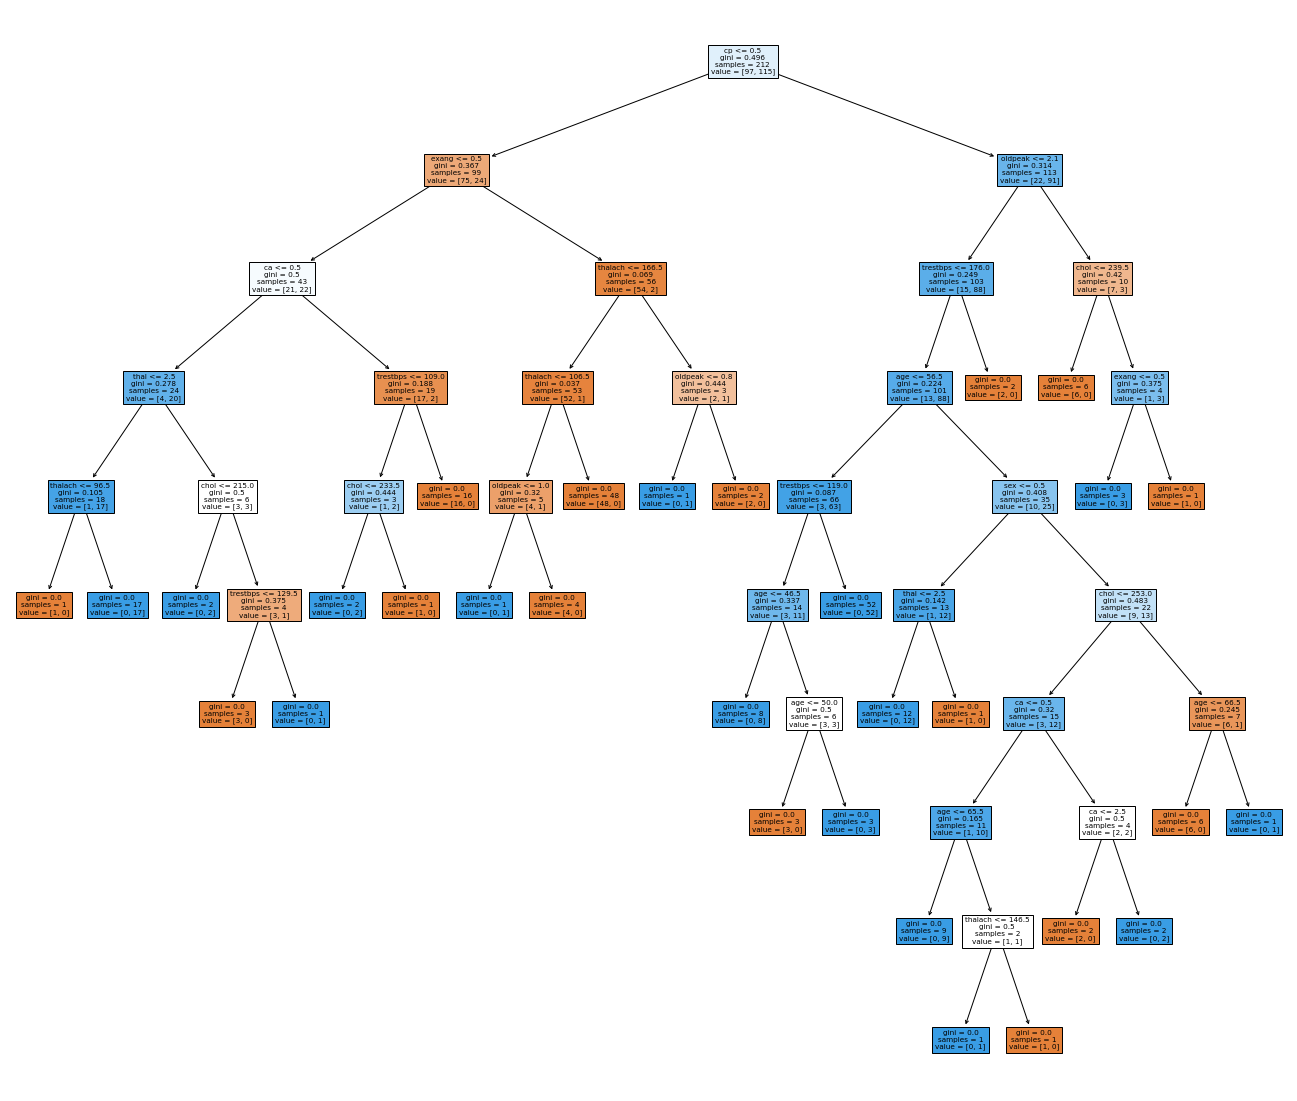

In [40]:
fig=plt.figure(figsize=(23,20))
_=tree.plot_tree(dt,feature_names=features,filled=True)

In [ ]:
''Pruning Technique  : to reduced overfitting situation'''
'''1. First pruning tech. withy the help of max_depth()'''
# max_depth() not more than 8

In [41]:
#create the object of DecisionTreeClassifier
dt1=DecisionTreeClassifier(max_depth=8)  #set max_depth=8 means cut branches
#from tail 

In [42]:
#call function
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.70      0.78      0.74        41
           1       0.80      0.72      0.76        50

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.75      0.75      0.75        91

Confusion matrix: 
[[32  9]
 [14 36]]


In [44]:
Y_test.value_counts()

1    50
0    41
Name: target, dtype: int64

In [45]:
#to show imp features 
dt1.feature_importances_   # (show reduction)

array([0.09279865, 0.0172992 , 0.32079735, 0.07627404, 0.09263043,
       0.        , 0.        , 0.06056168, 0.10570376, 0.08189019,
       0.        , 0.11727804, 0.03476665])

In [46]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [ ]:
#Feature selection : - help to select imp features 
#feature_test user defined function
#first parameter score_func : criteria=fregression if anova test and chi2 
#if chi-2 test
#second parameter : k means how many imp features from dataset

In [47]:
#model : logistic or dt or svm means classification
def feature_test(criteria,count,model):
    test = SelectKBest(score_func=criteria,k=count)
    X_train_new = test.fit_transform(X_train,Y_train)
    X_test_new = test.transform(X_test)
    model.fit(X_train_new,Y_train)
    y_pred = model.predict(X_test_new)
    print(classification_report(Y_test,y_pred))
    
    print(test.get_support())#show imp features
    return model

In [48]:
from sklearn.feature_selection import chi2 #chi-2 test
from sklearn.feature_selection import f_regression #ANova test
from sklearn.feature_selection import SelectKBest

In [49]:
#Create object of LogisticRegression class
lr=LogisticRegression()
#call function
feature_test(f_regression,8,lr) #f_regression means =anova test and 8 : means
#no of imp features means k and lr means model train and test with logistic reg.

              precision    recall  f1-score   support

           0       0.83      0.73      0.78        41
           1       0.80      0.88      0.84        50

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91

[False  True  True False False False False  True  True  True  True  True
  True]


LogisticRegression()

In [50]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [51]:
##Create object of LogisticRegression class
lr=LogisticRegression()
#call function
feature_test(chi2,4,lr) #chi-2 test

              precision    recall  f1-score   support

           0       0.80      0.68      0.74        41
           1       0.77      0.86      0.81        50

    accuracy                           0.78        91
   macro avg       0.78      0.77      0.77        91
weighted avg       0.78      0.78      0.78        91

[False False  True False False False False  True False  True False  True
 False]


LogisticRegression()

In [ ]:
#SVM
#PCA
